Azure - Modern Data Warehouse
drawing

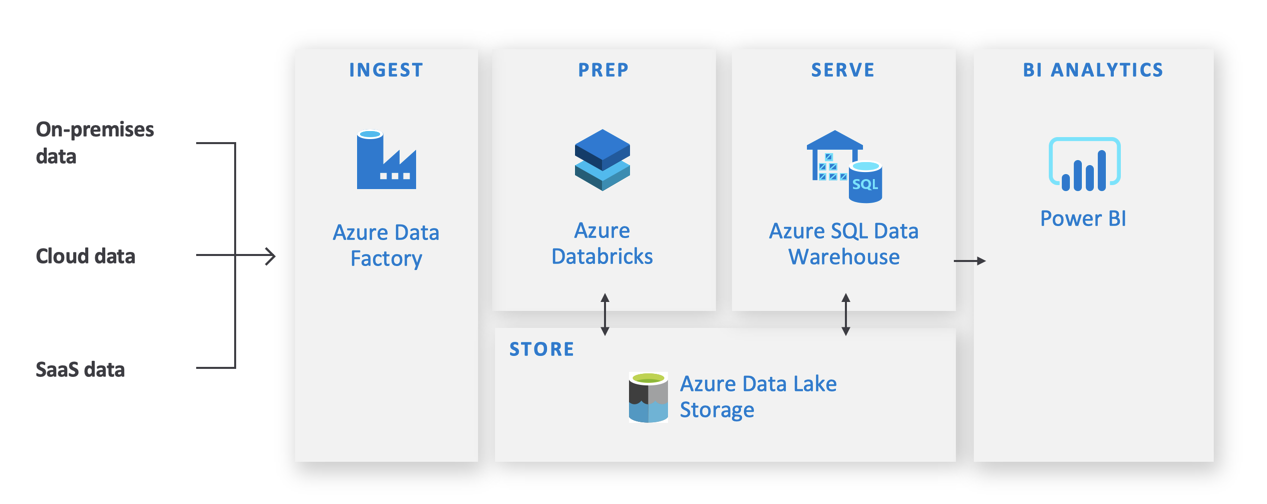

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz 
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
ls spark-2.4.4-bin-hadoop2.7/data/graphx/

followers.txt  users.txt


In [0]:
%cat spark-2.4.4-bin-hadoop2.7/data/graphx/users.txt

1,BarackObama,Barack Obama
2,ladygaga,Goddess of Love
3,jeresig,John Resig
4,justinbieber,Justin Bieber
6,matei_zaharia,Matei Zaharia
7,odersky,Martin Odersky
8,anonsys


In [0]:
users=spark.read.csv('spark-2.4.4-bin-hadoop2.7/data/graphx/users.txt', sep=",", inferSchema=True, header=False).toDF('ID','username','FullName')

In [0]:
users.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- username: string (nullable = true)
 |-- FullName: string (nullable = true)



In [0]:
users.show()

+---+-------------+---------------+
| ID|     username|       FullName|
+---+-------------+---------------+
|  1|  BarackObama|   Barack Obama|
|  2|     ladygaga|Goddess of Love|
|  3|      jeresig|     John Resig|
|  4| justinbieber|  Justin Bieber|
|  6|matei_zaharia|  Matei Zaharia|
|  7|      odersky| Martin Odersky|
|  8|      anonsys|           null|
+---+-------------+---------------+



In [0]:
calfornia=spark.read.csv('sample_data/california_housing_train.csv', sep=",",inferSchema=True, header=True)

In [0]:
calfornia.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [0]:
calfornia.describe()

In [0]:
%%sh 
wget -P /tmp https://raw.githubusercontent.com/Azure/usql/master/Examples/Samples/Data/json/radiowebsite/small_radio_json.json


--2020-01-15 04:14:35--  https://raw.githubusercontent.com/Azure/usql/master/Examples/Samples/Data/json/radiowebsite/small_radio_json.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8476 (8.3K) [text/plain]
Saving to: ‘/tmp/small_radio_json.json’

     0K ........                                              100% 46.7M=0s

2020-01-15 04:14:35 (46.7 MB/s) - ‘/tmp/small_radio_json.json’ saved [8476/8476]



In [0]:
%cat /tmp/small_radio_json.json

In [0]:
df=spark.read.json("/tmp/small_radio_json.json")

In [0]:
df.show()

+--------------------+---------+---------+------+-------------+----------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+------+
|              artist|     auth|firstName|gender|itemInSession|  lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|userId|
+--------------------+---------+---------+------+-------------+----------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+------+
|         El Arrebato|Logged In| Annalyse|     F|            2|Montgomery|234.57914| free|  Killeen-Temple, TX|   PUT|NextSong|1384448062332|     1879|Quiero Quererte Q...|   200|1409318650332|   309|
|Creedence Clearwa...|Logged In|   Dylann|     M|            9|    Thomas|340.87138| paid|       Anchorage, AK|   PUT|NextSong|1400723739332|       10|        Born To Move|   200|1409318653332|   

In [0]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userId: string (nullable = true)

